<a href="https://colab.research.google.com/github/Shashi2022/object-detection/blob/master/object-recognition-with-cnn-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
# The CIFAR10 dataset contains 60,000 color images in 10 classes, 
# with 6,000 images in each class. The dataset is divided into 50,000 training
# images and 10,000 testing images.
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()


In [3]:
#To know the shape of train dataset
X_train.shape

(50000, 32, 32, 3)

In [4]:
#To know the shape of train dataset
X_test.shape

(10000, 32, 32, 3)

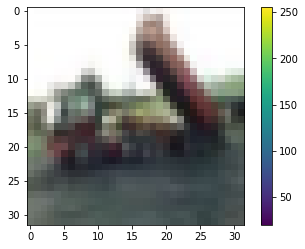

In [5]:
#plt.figure()
plt.imshow(X_train[2])
plt.colorbar()
#plt.grid(False)
plt.show()

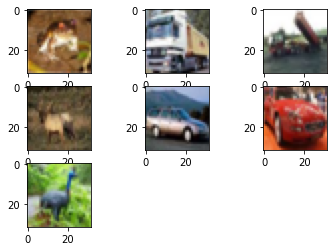

In [6]:
for i in range(7):
    # define subplot
    plt.subplot(330 + 1 + i)
   # plt.subplots(1, 5, figsize=(20,20))
    # plot raw pixel data
    plt.imshow(X_train[i])
plt.show()

In [7]:
#Normalization
X_train, X_test = X_train/255.0, X_test/255.0

In [8]:
#Building CNN model
model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [10]:
initial_weights = model.get_weights()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True,validation_data=(X_test,y_test))
model.set_weights(initial_weights)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.5453 - accuracy: 0.4343 - val_loss: 1.3525 - val_accuracy: 0.5163
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2043 - accuracy: 0.5709 - val_loss: 1.1292 - val_accuracy: 0.6013
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0593 - accuracy: 0.6261 - val_loss: 1.0717 - val_accuracy: 0.6179
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9637 - accuracy: 0.6613 - val_loss: 1.0177 - val_accuracy: 0.6467
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8833 - accuracy: 0.6892 - val_loss: 0.9296 - val_accuracy: 0.6763
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8242 - accuracy: 0.7095 - val_loss: 0.9268 - val_accuracy: 0.6792
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7759 - accuracy: 0.7263 - val_loss: 0.9083 -

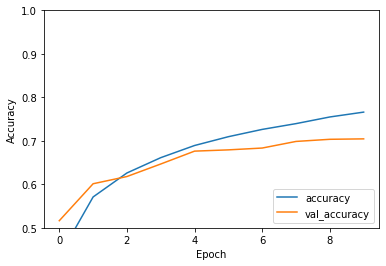

In [11]:
#Plot a graph : Accuracy Vs Val_Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
#Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.15,
            height_shift_range=0.15,
            zoom_range=0.5,
            horizontal_flip=True
            )


In [13]:
datagen.fit(X_train)

In [14]:
history = model.fit_generator(datagen.flow(X_train, y_train,
                                    batch_size=32),
                                    epochs=10,
                                    validation_data=(X_test, y_test),
                                    workers=4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1563/1563 [==============================] - 96s 62ms/step - loss: 1.8742 - accuracy: 0.3074 - val_loss: 1.6171 - val_accuracy: 0.4307
Epoch 2/10
1563/1563 [==============================] - 96s 62ms/step - loss: 1.6958 - accuracy: 0.3810 - val_loss: 1.4462 - val_accuracy: 0.4832
Epoch 3/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.6023 - accuracy: 0.4197 - val_loss: 1.3576 - val_accuracy: 0.5090
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5427 - accuracy: 0.4419 - val_loss: 1.3183 - val_accuracy: 0.5242
Epoch 5/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4840 - accuracy: 0.4622 - val_loss: 1.3520 - val_accuracy: 0.5259
Epoch 6/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4441 - accuracy: 0.4818 - val_loss: 1.2666 - val_accuracy: 0.5467
Epoch 7/10
1563/1563 [==========================

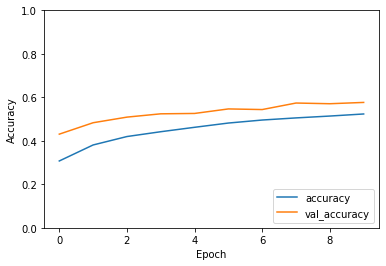

In [15]:
#Plot a graph : Accuracy Vs Val_Accuracy after data augmentation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [16]:
def load_image_show(image_path):
  from keras.preprocessing.image import load_img
  image = load_img(image_path, target_size=(32, 32))
  #plt.figure()
  plt.imshow(image)
  plt.colorbar()
  #plt.grid(False)
  plt.show()
  return image

In [17]:
#Changing image type to np array
def convert_np_array(image):
  type(image)
  test_img=np.asarray(image)
  test_singleimg=np.array([test_img])
  return test_singleimg

Using TensorFlow backend.


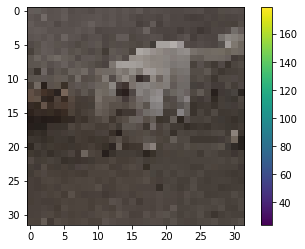

In [18]:
dog1 = load_image_show('/content/sample_data/Dog1.jpg')

In [19]:
dog1_np = convert_np_array(dog1)

In [20]:
#Predicting with model
model.predict(dog1_np)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

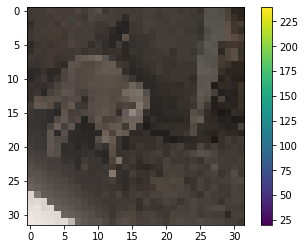

In [21]:
dog2 = load_image_show('/content/sample_data/Dog2.jpg')

In [22]:
dog2_np = convert_np_array(dog2)

In [23]:
#Predicting with model
model.predict(dog2_np)

array([[0.0000000e+00, 9.9997580e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.6072960e-26,
        0.0000000e+00, 2.4166202e-05]], dtype=float32)